## Final Project Submission

Please fill out:
* Student name: Aaron Lee
* Student pace: self paced
* Scheduled project review date/time: #########
* Instructor name: Jeff Herman
* Blog post URL: ###########


# Access TMDB database


This data project will investigate the relationship between the running time of a movie, and its potential revenue production.

In [ ]:
# Access TMDB
import json
import pandas as pd

def get_keys(path):
    with open(path) as f:
        return json.load(f)
    

keys = get_keys("/Users/aaronlee/.secret/tmdb_api.json")

api_key = keys['api_key']
api_key4 = keys['api_key4']


We will be using "The Movie Database" (TMDB) API to access the the box office info we need for this project.  Below are some examples of API calls for TMDB.  

In [ ]:
# useful urls to access tmdb
base_url = 'https://api.themoviedb.org/3/'
# /person/person_id, /movie/movie_id, /keywords/[keys] , 


# HOW TO ACCESS DB
# 2017 highest grossing
params = {'primary_release_year': 2017,
          'sort_by': 'revenue.desc'
         }

# highest revenue Tom Cruise scifi movie
params = {'with_genres': 878,
          'with_cast': 500,
          'sort_by': 'revenue.desc'
        }


# Commented out below is a proper request

#response = requests.get(base_url + 'discover/movie?api_key=' +  api_key, params=params)
# the movies for the retrieved page is located in response.json()['results']


We will create an API request to get the last five years of movies sorted by budget.  This will give a good cross section of movies which have gone into wide theater release.  We will choose not to use data from 2020 due to the COVID-19 pandemic.

In [ ]:
import requests


# We will get the top n(sample size) number of movies from the indicated range of years
# TMDB displays 20 per page.  Thats 50 pages worth!

def movie_selection_response(n, start_year, end_year):
    """Get a list of movie data.
    Args:
        n (int): number of movies to grab.
        start_year (int): earliest production year for movies returned
        end_year (int): latest production year for movies returned
    Returns:
       list: each index is a dict representing api results for single movie.
    """
    pages = 1 + n // 20 # db returns 20 results per page
    list_of_dicts = []  # list to be returned
    
    for i in range(1, pages + 1):
        # each iteration and api call is for a single page (20 movies)
        params = {'primary_release_year.gte': str(start_year),
                  'primary_release_year.lte': str(end_year),
                  'sort_by': 'budget.desc',
                  'page': i,
                  'adult': False}
        
        #Fetch Movie Data
        response = requests.get(base_url + 'discover/movie?api_key=' +  api_key, params=params)
        
        # Go through results and add each to movie dict
        for movie in response.json()['results']:
            list_of_dicts.append(movie)
    
    return list_of_dicts[:n]

sample_size = 100
all_my_movies = movie_selection_response(sample_size, 2015, 2019)
all_my_movies[0]
#print(resp.json()['results'])

We have retrieved the basic info for each movie which also contains the movie 'id' number.
We now extract all the movie 'id's.

In [18]:
all_my_movies[0]  # look at data for first movie

# lets grab all of the movie numbers
movie_ids = [movie['id'] for movie in all_my_movies]

movie_ids[:5]

[652502, 682837, 652516, 685376, 691637]

Now that we can the movie 'id' for TMDB, we can do a detailed movie api call for all of the selected movies.  This data includes: title, revenue, budget, runtime, etc.  



In [ ]:
all_movie_details = []

i = 1

while i < sample_size:
    #Fetch Movie Data
    movie_id = movie_ids[i]
    print(movie_id)
    movie_response = requests.get(base_url + 'movie/' + str(movie_id) + '?api_key=' +  api_key)
    all_movie_details.append(movie_response.json())
    i += 1
    

682837
652516
685376
691637
679621
643102
634153
643130
641183
593425
636442
643153
643160
578939
647944
647056
286446
607598
74296
277602
499970
311033
526653
441640
628951
628963
546286
625415
565367
393451
597993
315647
650027
654744
650027
654744
654266
650851
655869
649112
627494
475836
564296
331758
656990
648994
412726
412832
412860
665361
665363
679621
565588
682122
677185
433524
685719
686910
661284
550260
581314
559292
361900
62444
685504
679962
687481
563475
687873
688535
679962
687481
361900
62444
684828
610936
688576
688535
688342
502119
638046
673972
652963
677033
653180
578429
669787
570889
614405
492534
433369
86794
661356
667624
661981
687568
688899
662008
661642
669754
690187
472260
690254
687012
668234
667136
686666
682368
62793
674337
689100
4385
229901
689533
666287
633101
685861
519236
691137
302654
692331
684088
691022
692398
685376
691637
682837
652502
652516
636487
530498
465939
649055
406846
34029
693704
692806
693896
289499
694684
671849
539957
668930
691163


In [19]:
all_movie_details[:10]

[{'status_code': 34,
  'status_message': 'The resource you requested could not be found.'},
 {'status_code': 34,
  'status_message': 'The resource you requested could not be found.'},
 {'status_code': 34,
  'status_message': 'The resource you requested could not be found.'},
 {'status_code': 34,
  'status_message': 'The resource you requested could not be found.'},
 {'status_code': 34,
  'status_message': 'The resource you requested could not be found.'},
 {'status_code': 34,
  'status_message': 'The resource you requested could not be found.'},
 {'status_code': 34,
  'status_message': 'The resource you requested could not be found.'},
 {'status_code': 34,
  'status_message': 'The resource you requested could not be found.'},
 {'status_code': 34,
  'status_message': 'The resource you requested could not be found.'},
 {'status_code': 34,
  'status_message': 'The resource you requested could not be found.'}]

With detailed info on every movie in our search, we can finally put it all into a Panda dataframe for further investigation.  We will attempt to look at major trends in movies

In [20]:
all_movie_details[0]['runtime']  # each list item is a movie dict


df = pd.DataFrame(all_movie_details)
df = df[(df['vote_count'] > 0) & (df['runtime'] > 60)]  # get rid of shorts and non voted

df
    




KeyError: 'runtime'

Our investigation will be focused on the budget and revenues of movies. 
We begin by exploring these for our set of movies.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("BUDGET OVERVIEW")
print('Mean Budget: {:.2f} Million'.format(df['budget'].mean() / 1e6))
print('Median Budget: {:.2f} Million'.format(df['budget'].median() / 1e6))
print('First Quartile (25%): {:.2f} Million'.format(df['budget'].quantile(0.25) / 1e6))
print("IQR (25-50%): {:.2f} Million".format((df['budget'].quantile(0.75) - df['budget'].quantile(0.25)) / 1e6))
print("Std Dev: {:.2f} Million".format(df['budget'].std() / 1e6))

print("\nREVENUE OVERVIEW")
print('Mean Revenue: {:.2f} Million'.format(df['revenue'].mean() / 1e6))
print('Median Revenue: {:.2f} Million'.format(df['revenue'].median() / 1e6))
print('First Quartile (25%): {:.2f} Million'.format(df['revenue'].quantile(0.25) / 1e6))
print("IQR (25-50%): {:.2f} Million".format((df['revenue'].quantile(0.75) - df['revenue'].quantile(0.25)) / 1e6))
print("Std Dev: {:.2f} Million".format(df['revenue'].std() / 1e6))


# df.info()
# df.describe()
# df['budget'].describe()
# df['revenue'].describe()


# df with just revenue and budget
df_returns = df[['budget', 'revenue']].copy()

sns.set_style('darkgrid')


dims = (18, 6)

df_returns.tail()

#sns.boxplot(data=df_returns, palette='Reds')
# xlabels = ['{:d}'.format(int(x/1000000)) for x in ax.get_xticks()]
# ax.set_title("Revenue for Major Theaterical Releases")
# ax.set_xticklabels(xlabels)
# ax.set(xlabel='Millions (USD)')




BUDGET OVERVIEW


NameError: name 'df' is not defined

[Text(0.5, 0, 'Millions (USD)')]

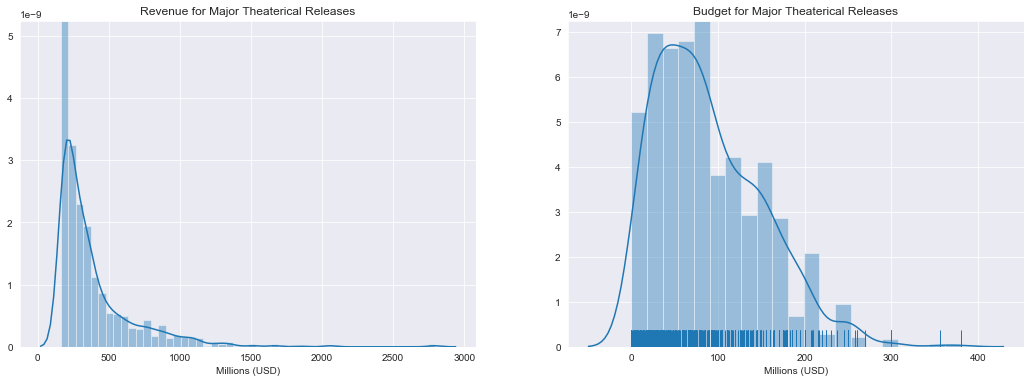

In [199]:


dims = (18, 6)
fig, ax = plt.subplots(1, 2, figsize=dims)

sns.distplot(df['revenue'], ax=ax[0]) 
ax[0].set_title("Revenue for Major Theaterical Releases")
xlabels = ['{:d}'.format(int(x/1000000)) for x in ax[0].get_xticks()]
ax[0].set_xticklabels(xlabels)
ax[0].set(xlabel='Millions (USD)')



sns.distplot(df['budget'], ax=ax[1], rug=True) 
ax[1].set_title("Budget for Major Theaterical Releases")
xlabels = ['{:d}'.format(int(x/1000000)) for x in ax[1].get_xticks()]
ax[1].set_xticklabels(xlabels)
ax[1].set(xlabel='Millions (USD)')



In [ ]:




        





#df.plot.scatter('runtime', 'revenue')



# fig, (ax1, ax2) = plt.subplots(ncols=2)
# sns.lmplot(x='idx', y=df['x'], ax=ax1)
# sns.lmplot(x=idx, y=df['y'], ax=ax2)


# sns.lmplot(x='runtime', y='revenue', data=df, scatter_kws={'alpha':'0.5', 's':10})

